In [373]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

In [374]:
#load data set from github
happ_dataset = pd.read_csv('happiness_score_dataset.csv')
happ_dataset

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [375]:
#checking first five rows
happ_dataset.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [376]:
#checking last five rows
happ_dataset.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [378]:
#checking rows and columns of data set
happ_dataset.shape

(158, 12)

In [379]:
#checking datatypes of table
happ_dataset.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [380]:
le = preprocessing.LabelEncoder()
list1 = ['Country','Region']
for val in list1:
    happ_dataset[val]=le.fit_transform(happ_dataset[val].astype(str))
print(happ_dataset.dtypes)

Country                            int32
Region                             int32
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object


In [381]:
#checking descriptions
happ_dataset.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [382]:
#checking null value present or not
happ_dataset.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

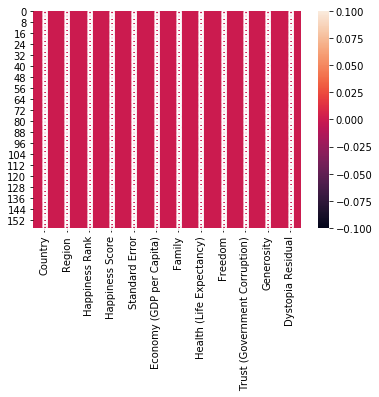

In [383]:
#checking null value present or not
sns.heatmap(happ_dataset.isnull(), annot=True)
plt.show()

In [384]:
happ_dataset_corr = happ_dataset.corr()
print(happ_dataset_corr.head)

<bound method NDFrame.head of                                 Country    Region  Happiness Rank  \
Country                        1.000000  0.005092       -0.098538   
Region                         0.005092  1.000000        0.213773   
Happiness Rank                -0.098538  0.213773        1.000000   
Happiness Score                0.083380 -0.176791       -0.992105   
Standard Error                 0.033879 -0.022600        0.158516   
Economy (GDP per Capita)       0.037808 -0.260139       -0.785267   
Family                         0.159416 -0.168533       -0.733644   
Health (Life Expectancy)       0.037829 -0.357508       -0.735613   
Freedom                        0.085684  0.092567       -0.556886   
Trust (Government Corruption)  0.088155  0.165040       -0.372315   
Generosity                     0.118085  0.273557       -0.160142   
Dystopia Residual             -0.019778 -0.057276       -0.521999   

                               Happiness Score  Standard Error  \
Countr

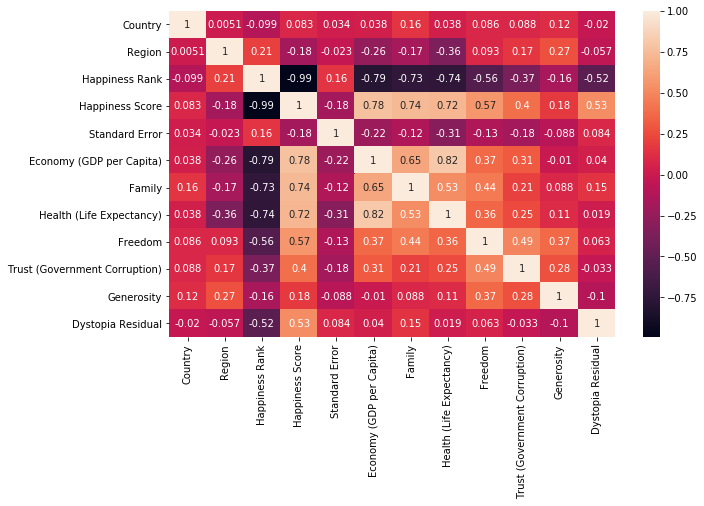

In [385]:
plt.figure(figsize=(10,6))
sns.heatmap(happ_dataset_corr,annot=True)

In [386]:
happ_dataset.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

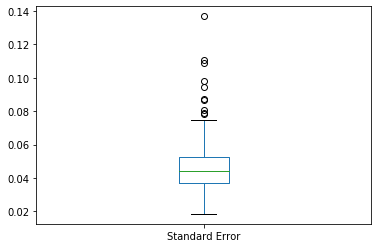

In [387]:
happ_dataset['Standard Error'].plot.box()

In [388]:
happ_dataset.drop('Standard Error', axis=1,inplace=True)
print(happ_dataset.shape)
print(happ_dataset.head())

(158, 11)
   Country  Region  Happiness Rank  Happiness Score  Economy (GDP per Capita)  \
0      135       9               1            7.587                   1.39651   
1       58       9               2            7.561                   1.30232   
2       37       9               3            7.527                   1.32548   
3      105       9               4            7.522                   1.45900   
4       24       5               5            7.427                   1.32629   

    Family  Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0  1.34951                   0.94143  0.66557                        0.41978   
1  1.40223                   0.94784  0.62877                        0.14145   
2  1.36058                   0.87464  0.64938                        0.48357   
3  1.33095                   0.88521  0.66973                        0.36503   
4  1.32261                   0.90563  0.63297                        0.32957   

   Generosity  Dystopi

In [389]:
happ_dataset.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [390]:
for col in happ_dataset.columns:
    if happ_dataset.skew().loc[col]>0.55:
        happ_dataset[col] = np.log1p(happ_dataset[col])

In [391]:
happ_dataset.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.180922
Generosity                       0.650767
Dystopia Residual               -0.238911
dtype: float64

In [392]:
#removing outliers
z = abs(zscore(happ_dataset))
print(happ_dataset.shape)
happ_dataset_final = happ_dataset.loc[(z<3).all(axis=1)]
print(happ_dataset_final.shape)

(158, 11)
(153, 11)


In [393]:
df_x = happ_dataset_final.drop(columns=['Dystopia Residual'])
y = happ_dataset_final[['Dystopia Residual']]

In [394]:
sc = preprocessing.StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x,columns=df_x.columns)

In [395]:
x.skew()

Country                          0.029724
Region                          -0.079618
Happiness Rank                   0.021390
Happiness Score                  0.151167
Economy (GDP per Capita)        -0.364680
Family                          -0.822732
Health (Life Expectancy)        -0.743864
Freedom                         -0.408952
Trust (Government Corruption)    1.139661
Generosity                       0.407975
dtype: float64

In [396]:
x_train,x_test, y_train,y_test = train_test_split(x,y,random_state=55,test_size=0.20)

In [397]:
max_r_score= 0 
for r_state in range(42,100):
    x_train,x_test, y_train,y_test = train_test_split(x,y, random_state = r_state, test_size=0.20)
    regr = linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr = r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state = r_state
print("max r2 score coreesponding to ",final_r_state," is ",max_r_score)

max r2 score coreesponding to  79  is  0.9999054597427581


In [398]:
cross_val_score(linear_model.LinearRegression(),x,y,cv=10, scoring="r2").mean()

0.9994420234432763

In [399]:
#max r2 score we get at random_state = 79
x_train,x_test, y_train,y_test = train_test_split(x,y,random_state=79,test_size=0.20)
lreg = linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_pred = lreg.predict(x_test)

In [400]:
print("r2 score is:", r2_score(y_test,y_pred))
print("RMSE is:", np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is: 0.9999054597427581
RMSE is: 0.0057297861319883965


In [401]:
from sklearn.externals import joblib
joblib.dump(lreg, 'hapiness_linear_dataset.pkl')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['hapiness_linear_dataset.pkl']